In [2]:
pip install pandas numpy scikit-learn nltk matplotlib seaborn joblib fastapi uvicorn requests gradio transformers torch sentence-transformers


Active code page: 1252
Note: you may need to restart the kernel to use updated packages.


In [8]:
# === Notebook 01: Data Exploration & Cleaning ===
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import pandas as pd

data_path = r"C:\Users\satya\Downloads\customer_feedback_analysis\task\data\raw\Reviews.csv"
df = pd.read_csv(data_path)


In [5]:
print(df.columns)


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


Dataset shape: (568454, 10)
Columns: Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


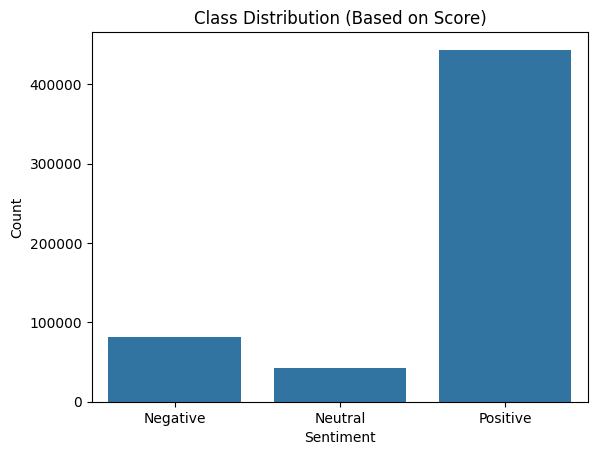


Sentiment Counts:
 sentiment
Positive    443756
Negative     82007
Neutral      42638
Name: count, dtype: int64

Sentiment Percentage:
 sentiment
Positive    78.070939
Negative    14.427666
Neutral      7.501394
Name: proportion, dtype: float64


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data_path = r"C:\Users\satya\Downloads\customer_feedback_analysis\task\data\raw\Reviews.csv"
df = pd.read_csv(data_path)

print("Dataset shape:", df.shape)
print("Columns:", df.columns)

# Drop missing and duplicate rows
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Create sentiment column from 'Score'
def label_sentiment(score):
    if score <= 2:
        return "Negative"
    elif score == 3:
        return "Neutral"
    else:
        return "Positive"

df['sentiment'] = df['Score'].apply(label_sentiment)

# Display sentiment distribution
sns.countplot(x='sentiment', data=df, order=['Negative', 'Neutral', 'Positive'])
plt.title("Class Distribution (Based on Score)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Optional: print sentiment counts and percentages
print("\nSentiment Counts:\n", df['sentiment'].value_counts())
print("\nSentiment Percentage:\n", df['sentiment'].value_counts(normalize=True) * 100)


In [7]:
# Save cleaned data
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/clean_data.csv", index=False)
print("✅ Cleaned dataset saved at data/processed/clean_data.csv")

✅ Cleaned dataset saved at data/processed/clean_data.csv
